## Data Analysis Steps

    The data analysis consists of following steps
    
        1. Asking question
        2. Data wrangling
        
            a. Gathering Data
                
                i.   CSV file
                ii.  API's
                iii. Web Scraping
                iv.  Databases
                
            b. Assessing data
            c. Cleaning data
            
        3. Exploratory data analysis
        4. Drawing conclusion
        5. Communicating results

---------
---------

# Data Wrangling
- Also known as `Data preprocessing`, `Data Munging`
- Consist three steps `Gather data` + `Assess data` + `Clean Data`

------------
------------

## Assessing Data

    In this step, the data is to understood more deeply, Before implementing methods to clean it. you will definitely need 
    to have a better idea about what the data is about.

## Type of unclean data

There are 2 type of unclean data
    
    1. Dirty Data (data with quality):
       dirty data also known as low quality data. Low quality data has content isshue.
    2. Messy Data (data with tidiness issues)
       messy data also known as untidy data. untidy data has structural issues.
       

### 1. Dirty Data

    When the data has following kinds of issues.
    
      1. Duplicated data
      2. Missing data
      3. Corrupt data
      4. Inaccurate data
      
     This kind of data known as dirty data.

### 2. Messy Data

    When the data is structral issue is known as messy or untidy data.

    Tidy data has following properties:
    
        1. Each variable froms a column
        2. Each observation forms a row 
        3. Each observational unit form a table
        
    If data voilates any one of the above known as untidy data
    Example: 
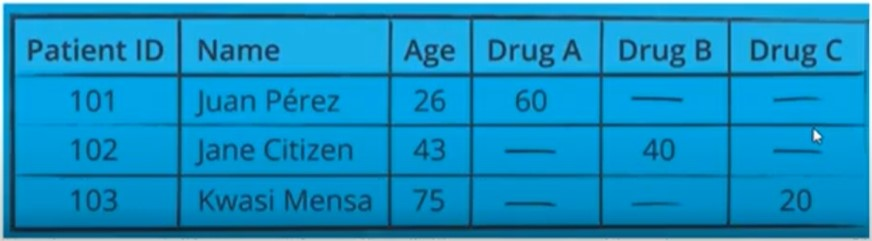

## Types of Assessment

    There are 2 types of assessment styles
    
        1. Manual - Looking through data manually in sheets
        2. Programmatic -  By using pandas functions such as info(), describe(), sample()

## Steps in Assessment

    There are 2 steps involved in Assessment
    
        1. Discover
        2. Document

### Example

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
patients = pd.read_csv('patients.csv')
treatment = pd.read_csv('treatments.csv')
adverse = pd.read_csv('adverse_reactions.csv')

In [ ]:
print(patients.shape)
print(treatment.shape)
print(adverse.shape)

In [ ]:
patients

In [ ]:
treatment

In [ ]:
patients.info()

In [ ]:
treatment.info()

In [ ]:
adverse.info()

In [ ]:
patients[patients['address'].isnull()]

In [ ]:
patients.describe()

In [ ]:
treatment.describe()

In [ ]:
patients.sample(5)

In [ ]:
patients.duplicated().count()

In [ ]:
patients[patients['address'].duplicated()]

### Data Quality Dimensions

1. Completeness Issues  ( their is no data)
2. Validity Issues ( their is data but invalid eg. hight --> -170cm)
3. Accuracy Issues ( thier is valid data but not accurate. eg. hight --> 1cm)
4. Consistancy Issues ( eg. City --> New Yark , City --> NY )

### Quality

[Completeness, validity, Accuracy, Consistancy]

##### patients

- zip code column stored in decimal format [V]
- certain zip code are of 4 digit [v]
- for the state column somtime full name is used and other time short time [IC]
- missing values for contact details of 12 patients [C]
- incorrect datatype for assigned_sex and birthdate [?]
- errorness in data for weights and hights [A]
- inconsitant way of storing phone no in contact [IC]
- duplicate data and not useful data in dataset (jon doe) [IC]

##### treatment

- h1bac column has missing values [C]
- novodra and auralin column has 'u' attached to number [V]
- only 280 rows are ther instead of 350 [C]
- name and surname colmn is in lower case [IC]
- incorrect datatype for auralin and novodra [V]
- hb1c column 9 instead of 4 [A]
- use of '-' instead of NaN in novodra and aurlin [IC]

##### adverse reaction

- name and surname column in lower case [IC]

### Tidiness

##### patients

- Phone and Email together in one column i.e. contact column

##### treatment

- 3 variables stored in aurolin and novodra column

##### adverse reaction

- no point of using this table


----------------
-------

## Cleaning Data

Follow the order provided below

- a .Completeness issues
- b. Tidiness issues
- c. Remaining data quality issues

#### Step Involved in Data Cleaning

- Define
- Code
- Test

Always make sure to create copy of your pandas dataframe before you start the cleaning

In [ ]:
patients_copy = patients.copy()
treatment_copy = treatment.copy()
adverse_copy = adverse.copy()

In [ ]:
patients[patients['address'].isnull()]

### a. Completeness issues

- Missing values for contact details of 12 patients
- Only 280 rows are there istead of 350
- hba1c column has missing values

#### Define

In [ ]:
 # subtract hba1c_start from hba1c_end to get hba1c_change

#### Code

In [ ]:
treatment_copy['hba1c_change'] = treatment_copy['hba1c_start'] - treatment_copy['hba1c_end']

#### Test

In [ ]:
treatment_copy['hba1c_change'].isnull().sum()

In [ ]:
treatment_copy.info()

In [ ]:
treatment_copy.describe()

In [ ]:
treatment_copy

### b. Tidiness issues

- Phone + Email in contact col patients
- Novodra and Auralin col treatment
- Merge the adverse table to treatment table

#### Define

In [ ]:
# Novodra and Aurolin unsing melt function

#### Code

In [ ]:
treatment_copy = pd.melt(treatment_copy, id_vars = ['given_name','surname','hba1c_start','hba1c_end','hba1c_change'], var_name = 'treatment', value_name='dose')

In [ ]:
treatment_copy = treatment_copy[treatment_copy['dose']!='-']

In [ ]:
treatment_copy['start'],treatment_copy['end'] = treatment_copy['dose'].str.split('-').str

In [ ]:
treatment_copy.drop(columns={'dose'}, inplace=True)

#### Test

In [ ]:
treatment_copy

###  C. Remaining issues

- xyz